<a href="https://colab.research.google.com/github/yiheng870106/Mathematics-of-Data-Science-Project-3-yiheng/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [6]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)
# X_train, y_train = X_train[:10000], y_train[:10000]
# X_test, y_test = X_test[:2000], y_test[:2000]

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import timeit,time
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=300,
    # early_stopping=True,
    # n_iter_no_change=10,
    random_state=1
)
start = time.time()
mlp.fit(X_train,y_train)
end = time.time()
print("Training time: ", end - start)

Training time:  53.278310775756836


Training accuracy 0.9919333333333333
Test accuracy 0.8607
Confusion matrix= 
 [[787   2  27  38   7   2 129   1   7   0]
 [  4 961   0  25   4   0   4   0   2   0]
 [ 32   0 812  16  63   0  71   0   5   1]
 [ 25   9  15 868  47   1  32   0   3   0]
 [  1   0 126  37 758   0  68   0  10   0]
 [  0   0   1   1   0 931   0  35   4  28]
 [120   1  99  34  70   1 661   0  14   0]
 [  0   0   0   0   0  14   0 947   0  39]
 [ 10   0   7   7   7   7  15   6 940   1]
 [  1   1   0   1   0  18   0  37   0 942]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.81      0.78      1000
           3       0.85      0.87      0.86      1000
           4       0.79      0.76      0.78      1000
           5       0.96      0.93      0.94      1000
           6       0.67      0.66      0.67      1000
           7       0.92      0.

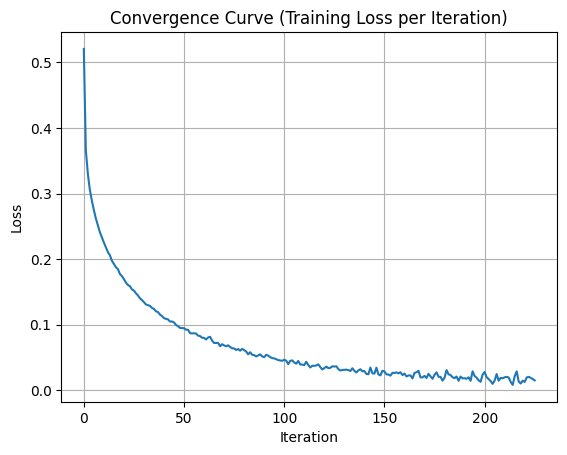

Training time: 414.61 seconds


In [2]:
# Start with a simple model architecture and train your model.
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=300,
    random_state=1
)

mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
print("Training accuracy", mlp.score(X_train,y_train))
print("Test accuracy", mlp.score(X_test,y_test))
print("Confusion matrix= \n", confusion_matrix(y_test,y_pred))
print("\n Classification report: \n",classification_report(y_test,y_pred))
print("Number of iterations until convergence:",mlp.n_iter_)
plt.plot(mlp.loss_curve_)
plt.title("Convergence Curve (Training Loss per Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

execution_time = timeit.timeit(
    'mlp.fit(X_train, y_train)',
    globals=globals(),
    number=5
)

avg_execution_time = execution_time / 5
print(f"Training time: {avg_execution_time:.2f} seconds")

     name  train_acc  test_acc  training time  number of iterations
0   (10,)   0.907900    0.8443     198.196200                   238
1   (50,)   0.991933    0.8607     373.903891                   226
2  (100,)   0.996467    0.8769     228.262869                    96
3  (200,)   0.988600    0.8830     281.960580                    73
4  (400,)   0.984583    0.8850     487.327116                    68
5  (700,)   0.997850    0.8923     938.303645                    73


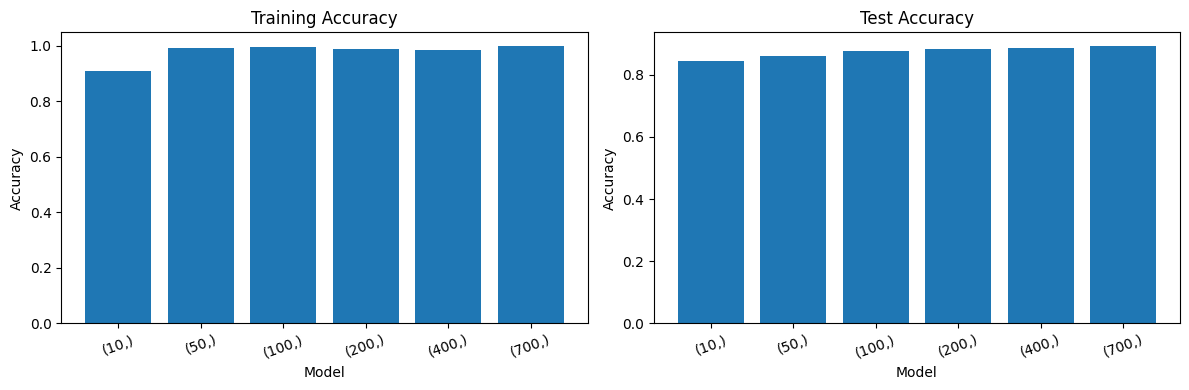

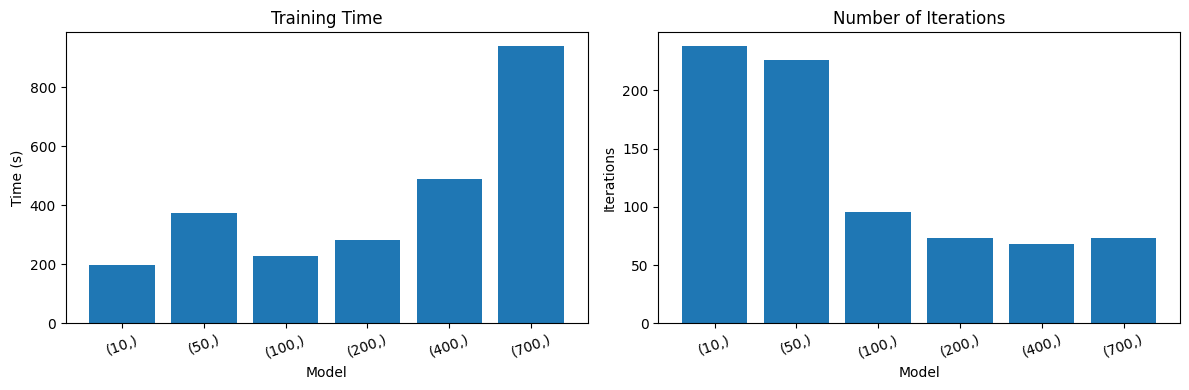

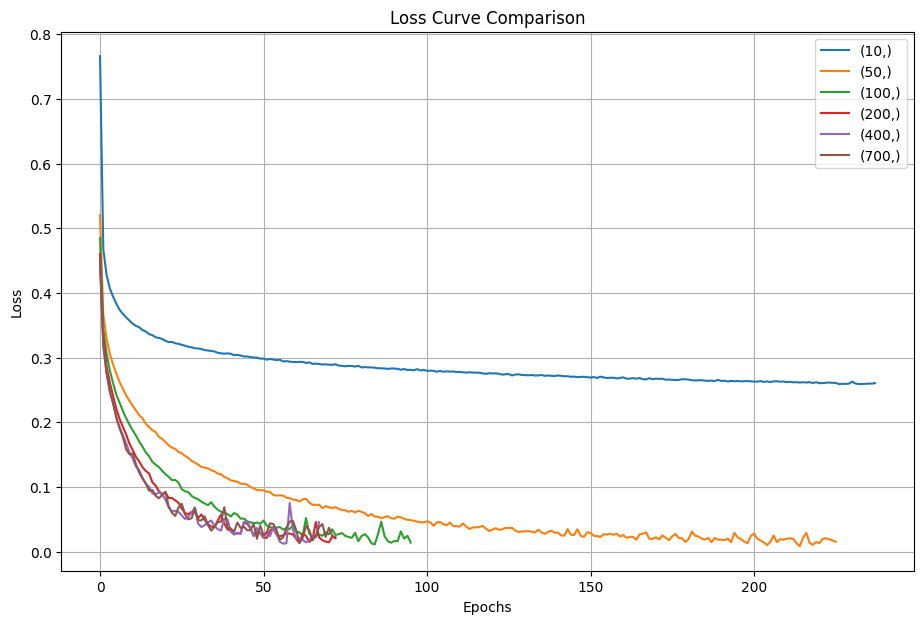

In [15]:
# the number of hidden neurons

configs_hidden_neurons = [
    ("(10,)", (10,)),
    ("(50,)", (50,)),
    ("(100,)", (100,)),
    ("(200,)", (200,)),
    ("(400,)", (400,)),
    ("(700,)", (700,))
]
results = []
loss_curves = {}

for (name,hidden_neurons) in configs_hidden_neurons:
  mlp = MLPClassifier(
    hidden_layer_sizes=hidden_neurons,
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_

df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(11, 7))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


                   name  train_acc  test_acc  training time  \
0              (100,50)   0.996933    0.8787     225.474267   
1             (100,100)   0.996833    0.8838     292.151240   
2          (100,100,50)   0.984317    0.8803     291.819078   
3         (100,100,100)   0.988450    0.8865     275.824429   
4      (200,100,100,50)   0.996950    0.8898     458.172727   
5  (400,200,200,100,50)   0.997117    0.8950     921.487145   

   number of iterations  
0                    80  
1                    98  
2                    88  
3                    80  
4                    80  
5                    75  


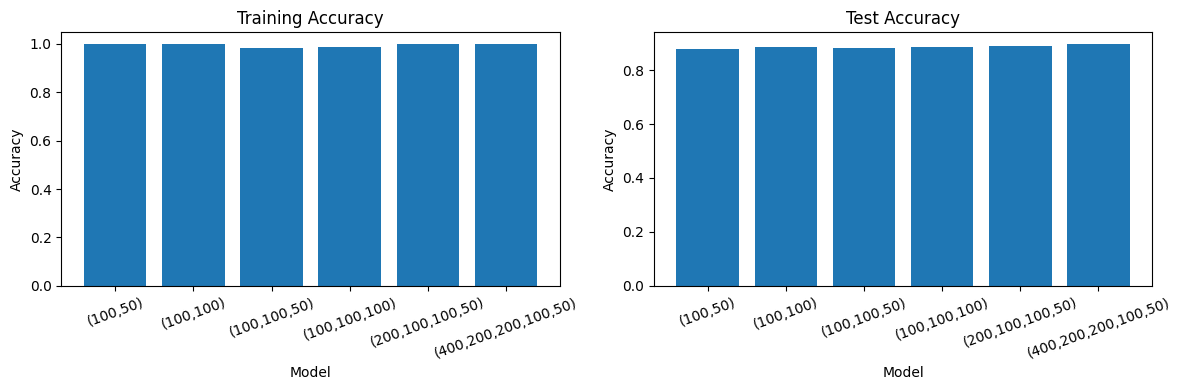

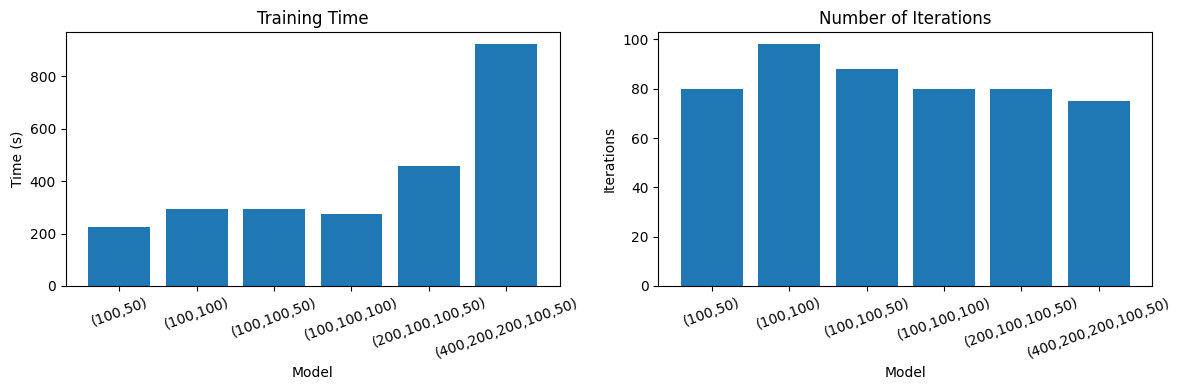

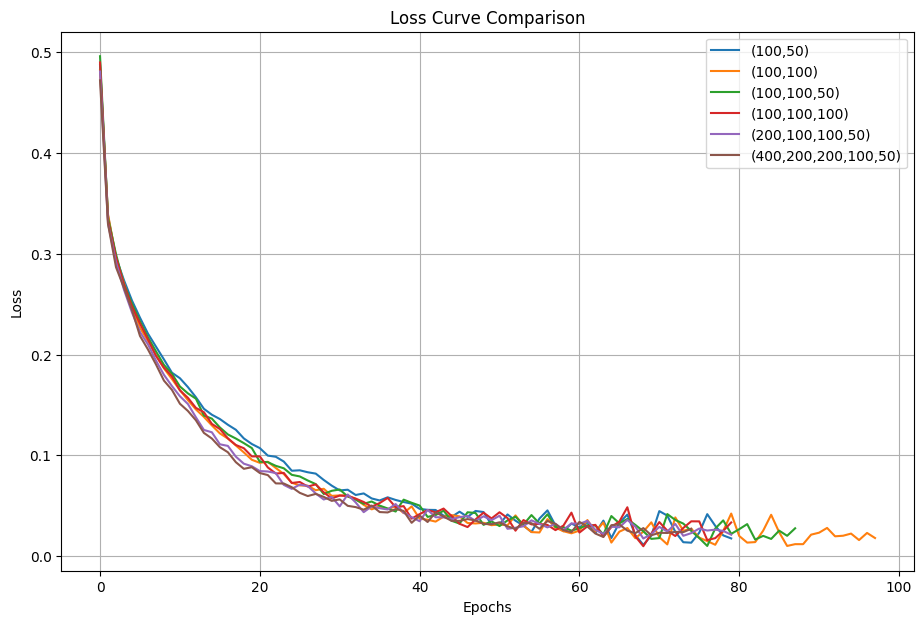

In [16]:
# the number of hidden layers and neurons

configs_hidden_layers = [
    ("(100,50)", (100,50)),
    ("(100,100)", (100,100)),
    ("(100,100,50)", (100,100,50)),
    ("(100,100,100)", (100,100,100)),
    ("(200,100,100,50)", (200,100,100,50)),
    ("(400,200,200,100,50)", (400,200,200,100,50))
]
results = []
loss_curves = {}

for (name,hidden_layers) in configs_hidden_layers:
  mlp = MLPClassifier(
    hidden_layer_sizes=hidden_layers,
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(11, 7))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


       name  train_acc  test_acc  training time  number of iterations
0      relu   0.996933    0.8787     214.082173                    80
1      tanh   0.999483    0.8734     317.410699                    94
2  logistic   0.999983    0.8709     336.361066                   117


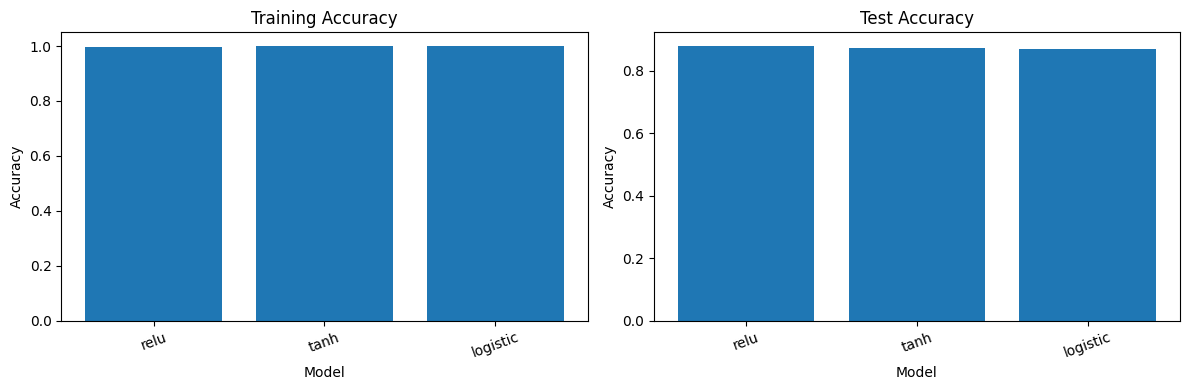

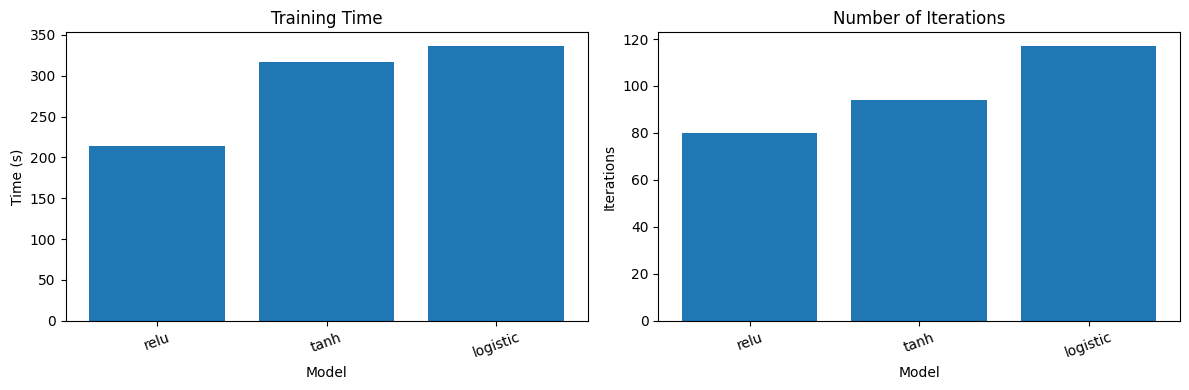

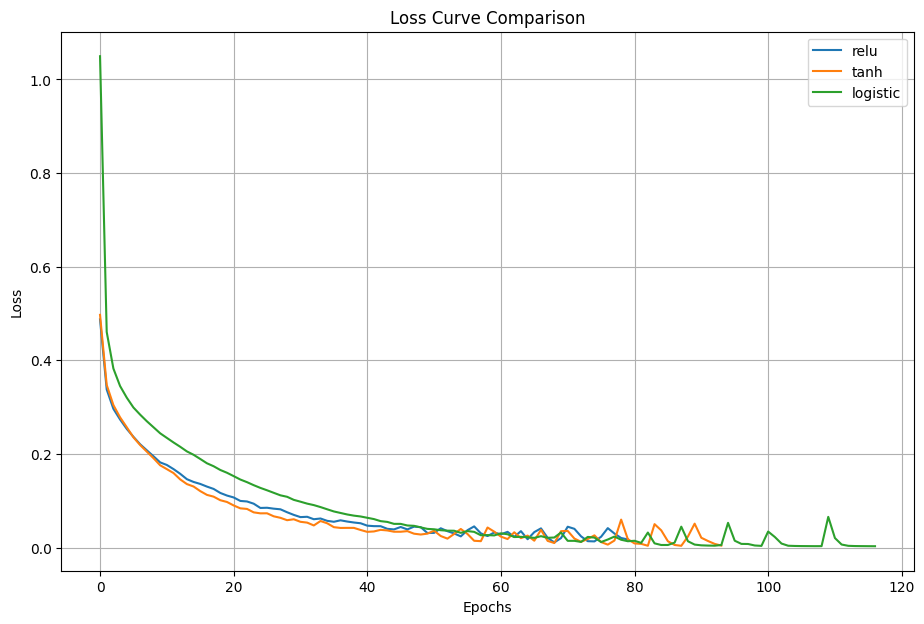

In [17]:
# the activation functions
configs_activations = [
    ("relu", 'relu'),
    ("tanh", 'tanh'),
    ("logistic", 'logistic')
]
results = []
loss_curves = {}

for (name,activation) in configs_activations:
  mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation=activation,
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(11, 7))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# optimization method
configs_optimization = [
    ("adam", 'adam'),
    ("sgd", 'sgd'),
    ("rmsprop", 'rmsprop'),
]
results = []
loss_curves = {}

for (name,solver) in configs_optimization:
  mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver=solver,
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(11, 7))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


InvalidParameterError: The 'solver' parameter of MLPClassifier must be a str among {'adam', 'lbfgs', 'sgd'}. Got 'rmsprop' instead.

In [ ]:
# the learning rate
configs_learning_rate = [
    ("lr=0.001", 0.001),
    ("lr=0.01", 0.01),
    ("lr=0.1", 0.1),
    ("lr=1", 1)
]
results = []
loss_curves = {}

for (name,learning_rate) in configs_learning_rate:
  mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    learning_rate_init=learning_rate,
    alpha=0.0001,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(11, 7))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# regularization
configs_regularization = [
    ("no regularization", 0),
    ("alpha=0.0001", 0.0001),
    ("alpha=0.001", 0.001),
    ("alpha=0.01", 0.01),
    ("alpha=0.1", 0.1)
]
results = []
loss_curves = {}

for (name,alpha) in configs_regularization:
  mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=alpha,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(11, 7))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# early stopping settings.
configs_early_stopping = [
    ("no early stopping", 0),
    ("early stopping", 10),
    ("early stopping", 50),
    ("early stopping", 100),
    ("early stopping", 200),
    ("early stopping", 300)
]
results = []
loss_curves = {}

for (name,max_iter) in configs_early_stopping:
  mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=max_iter,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(11, 7))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


# 3. Fashion-MNIST image classification  using pytorch

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here